In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
%matplotlib inline

In [2]:
events = pd.read_csv("data/events.csv.gzip",compression='gzip', dtype={'date': 'str', 'event_id': np.int16, 'ref_type': 'category',
                                               'ref_hash': 'int64', 'application_id':np.int16, 'attributed': 'bool',
                                               'device_countrycode': 'int64', 'device_os_version':'float64', 'device_brand': 'float64',
                                               'device_model': 'float64', 'device_city':'float64', 'session_user_agent': 'float64',
                                               'trans_id': 'str', 'user_agent':'float64', 'event_uuid': 'str',
                                               'carrier': 'float64', 'kind':'float64', 'device_os': 'category',
                                                'connection_type':'str', 'ip_address': 'int64',
                                               'device_language': 'float64'}, parse_dates = ['date'])
events.drop('device_os',axis=1,inplace=True)
events.drop('session_user_agent',axis=1,inplace=True)
events.drop('user_agent',axis=1,inplace=True)
events.drop('kind',axis=1,inplace=True)
events.drop('device_countrycode',axis=1,inplace=True)
events.drop('device_os_version',axis=1,inplace=True)

events.head(5)

D:\Users\Lucas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,event_id,ref_type,ref_hash,application_id,attributed,device_brand,device_model,device_city,trans_id,event_uuid,carrier,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,NaN,5.990117e+18,3.258215e+18,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,NaN,5.990117e+18,3.258215e+18,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,NaN,5.990117e+18,3.258215e+18,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,NaN,5.990117e+18,2.551781e+18,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,NaN,5.960896e+18,6.959330e+18,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [3]:
events.dtypes

date               datetime64[ns]
event_id                    int16
ref_type                 category
ref_hash                    int64
application_id              int16
attributed                   bool
device_brand              float64
device_model              float64
device_city               float64
trans_id                   object
event_uuid                 object
carrier                   float64
wifi                       object
connection_type            object
ip_address                  int64
device_language           float64
dtype: object

In [4]:
events['trans_id'].value_counts()

{hash}                                                                                                           33
0                                                                                                                16
103430dcab4b60eb4f                                                                                                9
433f38e2c758468ab632dcab7281d4be_Y2NhPTEwLzI1LzIwMTggMTA6Mjk6MjUgUE0mb2ZmZXJJZD0zMzQ1NjQ0NiZhZmZJZD0yMjMyNzUx     7
210a4c5786d249c78bb30237abcac890_Y2NhPTQvMjEvMjAxOCA1OjI2OjM3IFBNJm9mZmVySWQ9MzM0NTY0NDYmYWZmSWQ9MTY2MTgxNQ==     6
77ca31a9-b0e0-4884-8de8-c2ee74f1cc32                                                                              2
1901171053a509cd7317f2c6                                                                                          2
0941bb7b-866f-4d5a-9b85-63e77b27d562                                                                              2
1500439142mb23318419296                                                 

In [5]:
events['hora']=events['date'].dt.hour
events['fecha']=events['date'].dt.date
events['ocurrencias']=1

ciudades_top=events['device_city'].value_counts().head(7)
ciudades_top=ciudades_top.index.tolist()

eventos_ciudades_top=events[events['device_city'].isin(ciudades_top)]
app_top=eventos_ciudades_top['application_id'].value_counts().head(7)
app_top=app_top.index.tolist()
app_top
eventos_top=eventos_ciudades_top[eventos_ciudades_top['application_id'].isin(app_top)]


eventos_top.head(5)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_brand,device_model,device_city,trans_id,event_uuid,carrier,wifi,connection_type,ip_address,device_language,hora,fecha,ocurrencias
3345,2019-03-07 23:02:57.574,81,1891515180541284343,1949214148750190386,7,False,NaN,2.435450e+18,3.800080e+18,NaN,c496ff1e-c970-441c-adea-02e7618f6561,2.248157e+17,NaN,Cable/DSL,8063312905782076152,3.301378e+18,23,2019-03-07,1
3346,2019-03-07 23:03:08.831,80,1891515180541284343,5258113686295781485,7,False,NaN,7.407931e+18,3.800080e+18,NaN,095a923e-ff5a-4cb5-bd4a-97fb0cda2f52,2.248157e+17,NaN,Cable/DSL,2213027709251908120,3.301378e+18,23,2019-03-07,1
3347,2019-03-07 23:14:50.587,81,1891515180541284343,7207550682989488408,7,False,NaN,9.221733e+18,3.800080e+18,NaN,07838d2f-4d25-4593-9c5d-6d2bd5bf500b,6.948828e+18,NaN,Cellular,9025052954832565196,3.301378e+18,23,2019-03-07,1
3348,2019-03-07 23:14:52.713,1,1891515180541284343,7207550682989488408,7,False,NaN,9.221733e+18,3.800080e+18,NaN,2ebf6094-4333-482f-9ec5-d6441845c804,6.948828e+18,NaN,Cellular,9025052954832565196,3.301378e+18,23,2019-03-07,1
3349,2019-03-07 23:15:26.935,80,1891515180541284343,8154487987953156778,7,False,NaN,1.540907e+18,3.800080e+18,NaN,8c35cfeb-0889-4513-989c-b22cb3ec9879,6.948828e+18,NaN,Cellular,5703892075934260403,3.301378e+18,23,2019-03-07,1


In [6]:
#events_acotado = events.dropna(subset= ['device_os'])
#events_acotado['device_os'].value_counts()
#sns.barplot(events_acotado['device_os'])

#installs['dia_de_semana']=np.int8(installs['created'].dt.weekday)
events.head()


,date,event_id,ref_type,ref_hash,application_id,attributed,device_brand,device_model,device_city,trans_id,event_uuid,carrier,wifi,connection_type,ip_address,device_language,hora,fecha,ocurrencias
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,NaN,5.990117e+18,3.258215e+18,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,NaN,Cable/DSL,7858558567428669000,4.077062e+17,0,2019-03-05,1
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,NaN,5.990117e+18,3.258215e+18,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,NaN,Cable/DSL,7858558567428669000,4.077062e+17,0,2019-03-05,1
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,NaN,5.990117e+18,3.258215e+18,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,NaN,Cable/DSL,7858558567428669000,4.077062e+17,0,2019-03-05,1
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,NaN,5.990117e+18,2.551781e+18,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,NaN,Cable/DSL,6324037615828123965,4.077062e+17,0,2019-03-05,1
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,NaN,5.960896e+18,6.959330e+18,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,NaN,Cable/DSL,2894495631302821483,3.301378e+18,21,2019-03-09,1


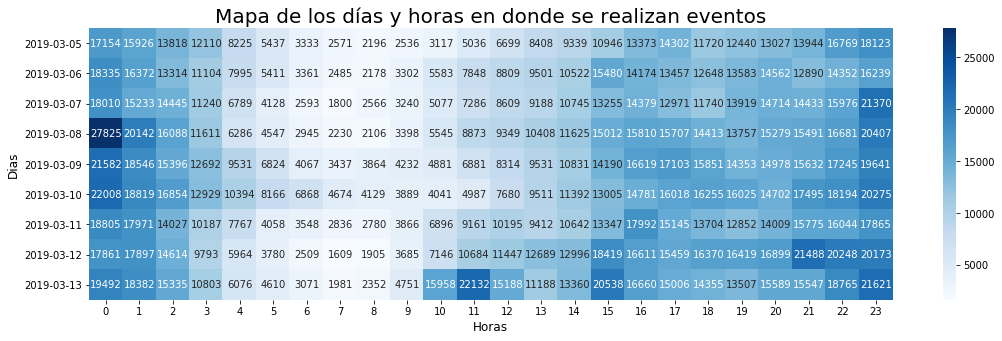

In [7]:
tabla=events[['fecha', 'hora','ocurrencias']].groupby(['fecha','hora']).count()
matriz = tabla.unstack()
fig, ax =plt.subplots(figsize=(18,5))
etiquetaX=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
#etiquetaY=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
heatmap_installs = sns.heatmap(matriz,xticklabels=etiquetaX,fmt="", cmap='Blues',ax=ax, annot = True);
heatmap_installs.set_title("Mapa de los días y horas en donde se realizan eventos",fontsize=20)
heatmap_installs.set_xlabel("Horas",fontsize=12)
heatmap_installs.set_ylabel("Dias",fontsize=12)
plt.savefig('heatmap_events.png', bbox_inches = 'tight')
plt.savefig('events_heatmap_sobre_las_horas_y_dias.png', bbox_inches = 'tight')

In [8]:
tabla=tabla.reset_index()
#tabla.bar9()
#tips = sns.load_dataset()
tabla
#sns.barplot(x=tabla.hora, y=tabla.ocurrencias)


,fecha,hora,ocurrencias
0,2019-03-05,0,17154
1,2019-03-05,1,15926
2,2019-03-05,2,13818
3,2019-03-05,3,12110
4,2019-03-05,4,8225
5,2019-03-05,5,5437
6,2019-03-05,6,3333
7,2019-03-05,7,2571
8,2019-03-05,8,2196
9,2019-03-05,9,2536


In [9]:
tabla=eventos_top[['device_city', 'application_id','ocurrencias']].groupby(['device_city','application_id']).count()
#tabla=tabla.unstack()
tabla=tabla.reset_index()

In [10]:
tabla

,device_city,application_id,ocurrencias
0,2.551781e+18,7,1301
1,2.551781e+18,8,1160
2,2.551781e+18,45,1348
3,2.551781e+18,64,336
4,2.551781e+18,103,230
5,2.551781e+18,140,839
6,2.551781e+18,248,1070
7,3.258215e+18,7,345
8,3.258215e+18,8,449
9,3.258215e+18,45,410


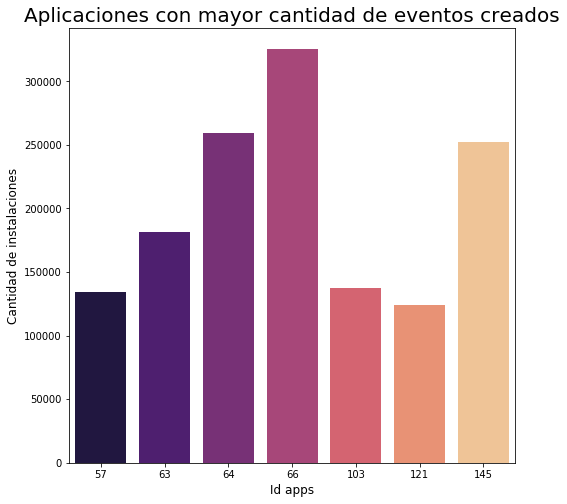

In [11]:
aplicaciones_top=events['application_id'].value_counts().head(7)
plt.subplots(figsize=(8,8))
grafico_top7_apps=sns.barplot(x=aplicaciones_top.index,y=aplicaciones_top.values,orient='v',palette="magma")
grafico_top7_apps.set_title("Aplicaciones con mayor cantidad de eventos creados",fontsize=20)
grafico_top7_apps.set_ylabel("Cantidad de instalaciones",fontsize=12)
grafico_top7_apps.set_xlabel("Id apps",fontsize=12)

plt.savefig('events_creados_general.png', bbox_inches = 'tight')

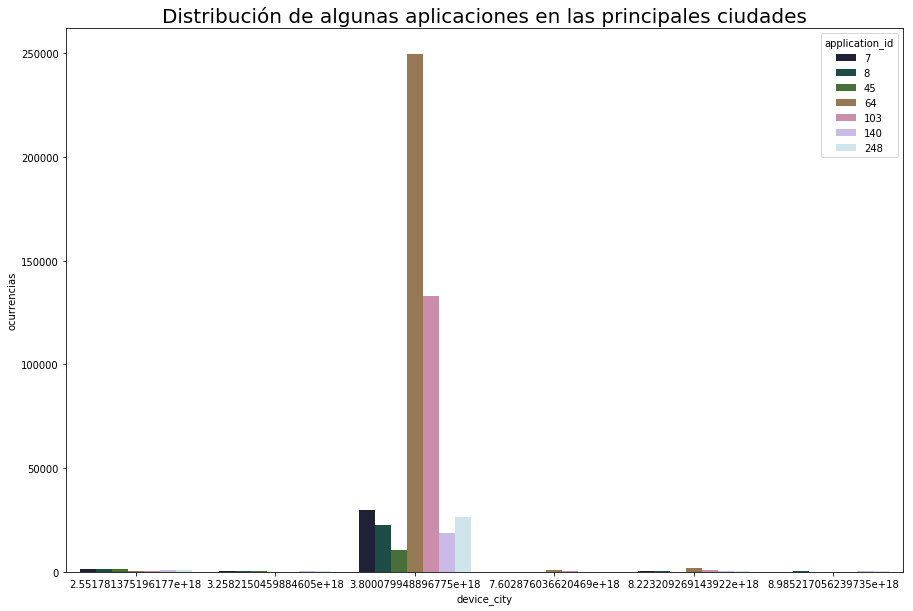

In [12]:
fig, ax =plt.subplots(figsize=(15,10))
#etiquetaX=["ciudad 1","ciudad 2","ciudad 3","ciudad 4","ciudad 5"]


ax=sns.barplot(x="device_city", y=tabla.ocurrencias, hue="application_id",palette="cubehelix", data=tabla)
ax.set_title("Distribución de algunas aplicaciones en las principales ciudades",fontsize=20)

ax
plt.savefig('events_ciudades_principales_app.png', bbox_inches = 'tight')

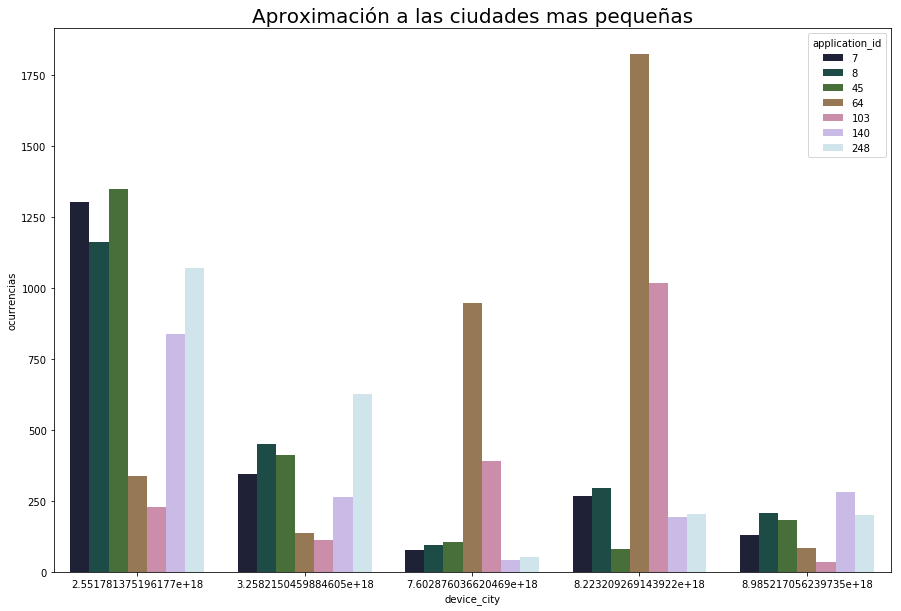

In [13]:
tabla_filtrada = tabla[tabla['device_city']!=3.800079948896775e+18]
fig, ax =plt.subplots(figsize=(15,10))
ax=sns.barplot(x="device_city", y=tabla.ocurrencias, hue="application_id",palette="cubehelix", data=tabla_filtrada)
ax.set_title("Aproximación a las ciudades mas pequeñas",fontsize=20)
plt.savefig('events_ciudades_principales_app2.png', bbox_inches = 'tight')

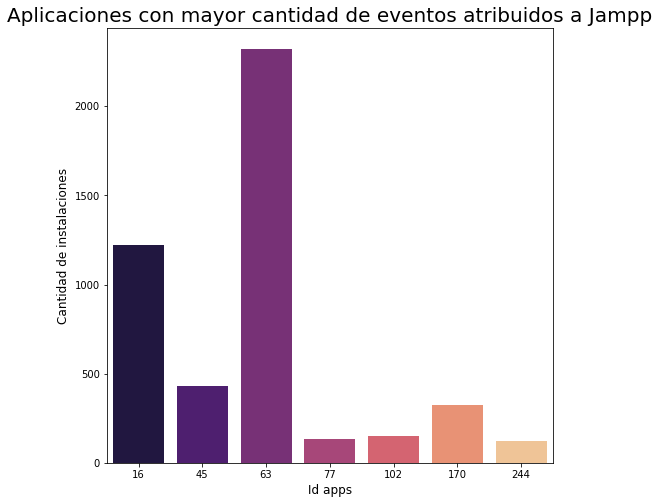

In [14]:
eventos_atribuidos=events[events['attributed']==True]
aplicaciones_top_atribuidos=eventos_atribuidos['application_id'].value_counts().head(7)
plt.subplots(figsize=(8,8))
grafico_top7_apps=sns.barplot(x=aplicaciones_top_atribuidos.index,y=aplicaciones_top_atribuidos.values,orient='v',palette="magma")
grafico_top7_apps.set_title("Aplicaciones con mayor cantidad de eventos atribuidos a Jampp",fontsize=20)
grafico_top7_apps.set_ylabel("Cantidad de instalaciones",fontsize=12)
grafico_top7_apps.set_xlabel("Id apps",fontsize=12)
plt.savefig('events_.png', bbox_inches = 'tight')
plt.savefig('events_bar_eventos_atribuidos.png', bbox_inches = 'tight')

In [15]:
#tips = sns.load_dataset("tips")
ciudades_top=eventos_atribuidos['device_city'].value_counts().head(7)
ciudades_top=ciudades_top.index.tolist()

eventos_ciudades_top=eventos_atribuidos[eventos_atribuidos['device_city'].isin(ciudades_top)]
app_top=eventos_ciudades_top['application_id'].value_counts().head(6)
app_top=app_top.index.tolist()
#app_top
eventos_top=eventos_ciudades_top[eventos_ciudades_top['application_id'].isin(app_top)]

tabla=eventos_top[['device_city', 'application_id','ocurrencias']].groupby(['device_city','application_id']).count()

tabla=tabla.reset_index()
tabla

,device_city,application_id,ocurrencias
0,6.276066e+17,45,28
1,8.578627e+17,246,7
2,1.164683e+18,45,18
3,2.551781e+18,45,78
4,2.551781e+18,106,18
5,2.551781e+18,244,14
6,3.258215e+18,45,8
7,3.258215e+18,106,10
8,3.258215e+18,244,5
9,3.800080e+18,7,40


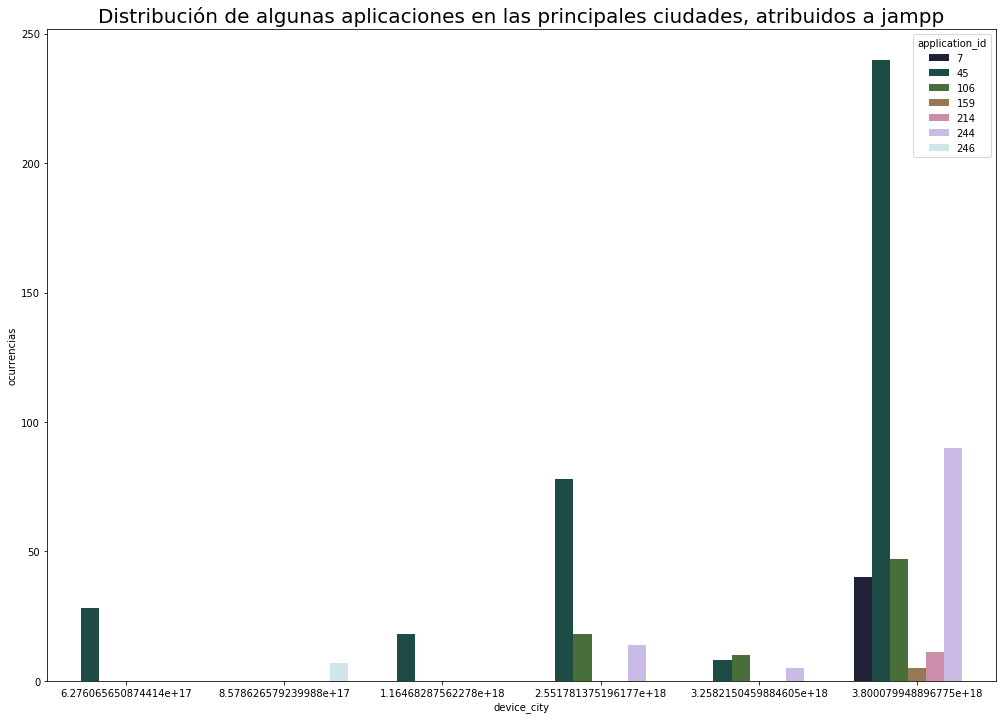

In [16]:
fig, ax =plt.subplots(figsize=(17,12))
etiquetaX=["ciudad 1","ciudad 2","ciudad 3","ciudad 4","ciudad 5"]


ax=sns.barplot(x="device_city", y=tabla.ocurrencias, hue="application_id",palette="cubehelix", data=tabla)
heatmap_installs.set_title("",fontsize=20)
ax.set_title("Distribución de algunas aplicaciones en las principales ciudades, atribuidos a jampp",fontsize=20)

ax;
plt.savefig('events_ciudades_principales_app_atribuidos.png', bbox_inches = 'tight')

In [17]:
events['wifi'].value_counts()

True     930902
False    447970
Name: wifi, dtype: int64

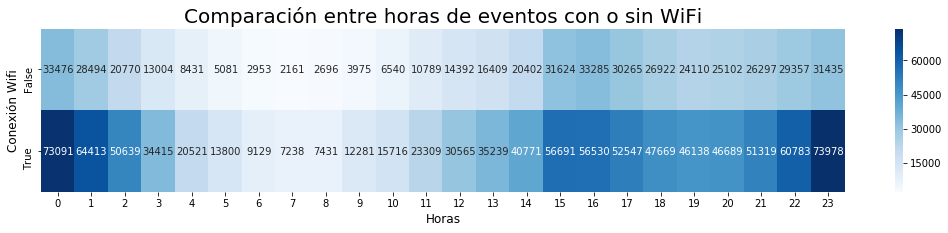

In [18]:
tabla=events[['wifi', 'hora','ocurrencias']].groupby(['wifi','hora']).count()
matriz = tabla.unstack()
fig, ax =plt.subplots(figsize=(18,3))
etiquetaX=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
#etiquetaY=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
heatmap_installs = sns.heatmap(matriz,xticklabels=etiquetaX,fmt="", cmap='Blues',ax=ax, annot = True);
heatmap_installs.set_title("Comparación entre horas de eventos con o sin WiFi",fontsize=20)
heatmap_installs.set_xlabel("Horas",fontsize=12)
heatmap_installs.set_ylabel("Conexión Wifi",fontsize=12)
plt.savefig('events_heatmap_wifi_horas.png', bbox_inches = 'tight')

In [19]:
filtro=eventos_atribuidos['event_id'].value_counts().index.tolist()
eventos_interesantes=events[events['event_id'].isin(filtro)]
eventos_interesantes['attributed'].value_counts()


False    1650932
True        5099
Name: attributed, dtype: int64